# Nearest neighbors

Is algorithm that allows to build find closest points

In [1]:
import io
from IPython.display import Image as IPImage

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

## Example

Let's consider an example - a set of two-dimensional objects that we are going to use among which we need to choose some set of the closest to the given object.

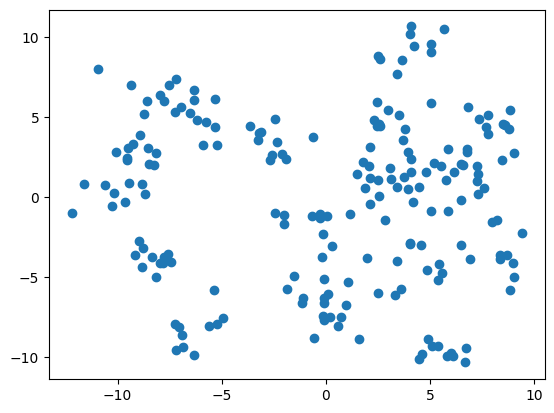

In [2]:
X, _ = make_blobs(
    n_samples=200,
    random_state=10,
    centers=20
)
plt.scatter(X[:,0], X[:,1])
plt.show()

To use `sklearn.neighbours.NearestNeighbours` we need to define the number of neighbours and apply it to the data under consideration.

In [3]:
nn = NearestNeighbors(n_neighbors=20).fit(X)

## `kneighbors` method

To get predictions, we need to use the `kneighbors` method on this object. The following example shows oupt for two specified points.

In [4]:
distances, indices = nn.kneighbors([[0,0], [2,2]])
display(pd.concat(
    {
        "distances" : pd.DataFrame(distances.T),
        "idices" : pd.DataFrame(indices.T)
    },
    axis = 1
))

distances           idices     
           0         1      0    1
0   1.091216  0.074815    170   40
1   1.138347  0.302468    118  142
2   1.309527  0.724875     45   10
3   1.336416  0.770803     54   62
4   1.535604  1.045741     71   84
5   1.980926  1.082107    137  122
6   2.103606  1.185385     10   18
7   2.159102  1.392603    151  137
8   2.286014  1.403301     70   51
9   2.294783  1.901535     76  144
10  2.452250  1.964599     62   50
11  2.565371  1.995106     50  149
12  2.629244  2.133964     29   47
13  2.630536  2.136047     46   75
14  2.745844  2.145365     84   11
15  2.853642  2.319772     40  127
16  2.868993  2.435027    142  151
17  3.049752  2.472242     80  128
18  3.080130  2.513303    160  113
19  3.164793  2.517343    166   61

For each object it returns the distances to the neighbours and the indices of the neighbours.

## `kneighbors_graph` method

`kneighbors_graph` is an alternative way of extracting neighbours. It returns neighbor elements as boolean mapping 1 - means that object corresponds to the set of neighbor objects, 0 doesn't.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

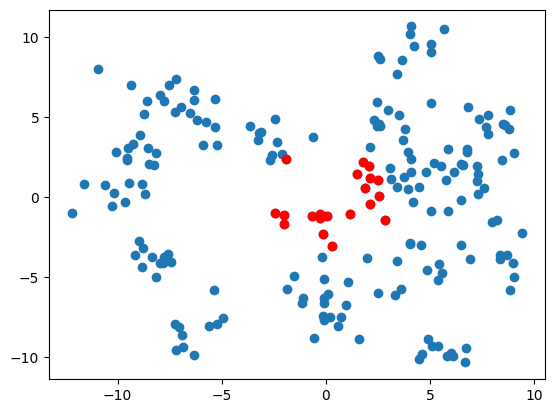

In [5]:
graph = nn.kneighbors_graph([[0,0]]).toarray()[0]
display(graph)
plt.scatter(
    X[:,0], X[:,1]
)
plt.scatter(
    X[graph.astype("bool"),0],
    X[graph.astype("bool"),1],
    color="red"
)
plt.show()

## Visualisation

The next cell represents a set of functions that allows to visualise the results of the nearest neighbours algorithm. It's often used in notebooks in this section, so it's stored in a separate module.

In [21]:
%%writefile nearest_neighbors_files/visualisations.py
import io
import PIL
from PIL import Image

import numpy as np
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

def get_picture(
    coordinates : list[float],
    nn : NearestNeighbors,
    X : np.array,
    title : str
) -> PIL.PngImagePlugin.PngImageFile:
    '''
    Get picture that show neighbours
    for given coordinates.

    Parameters
    ----------
    coordinates : list[float]
        сoordinates for which you need 
        to find neighbours;
    nn : sklearn.neighbors.NearestNeighbors
        algorithm under consideration;
    X : np.array of shape (n_samples, 2)
        this is two dimentional objects
        that will be represented at the
        scatter plot;
    title : str
        title that will be used for plot.

    Returns
    -------
    out : PIL.PngImagePlugin.PngImageFile
        picture with scatters.
    '''
    
    # getting neighrours
    distances, indices = nn.kneighbors([coordinates])

    # plotting scatter
    fig, ax = plt.subplots()
    ax.scatter(
        coordinates[0],
        coordinates[1],
        color="Green",
        s=100
    )
    ax.scatter(X[:,0], X[:,1])
    ax.scatter(X[indices, 0], X[indices, 1], color="red")
    plt.title(title)
    
    # saving to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close(fig)

    return Image.open(buf)

def get_gif(
    coordinates : list[list[float]], 
    nn : NearestNeighbors, 
    X : np.array,
    pictures_args : dict = {}
)->io.BytesIO:
    '''
    Get buffer containing gif
    file with animation where point 
    for which neighbours, moving
    according to given array.

    Parameters
    ----------
    coordinates : list[list[float]]
        array of coordinate combinations 
        along which the point will move 
        and for which we need to find neighbours;
    nn : sklearn.neighbors.NearestNeighbors
        algorithm under consideration;
    X : np.array of shape (n_samples, 2)
        this is two dimentional objects
        that will be represented at the
        scatter plot;
    pictures_args : dict
        this funciton is wrapper under get_picture
        so you can specify arguemnst to it.
    '''
    # generate frames on which the 
    # coordinate to which neighbours 
    # are searched moves in a circle.
    frames = [
        get_picture(
            coordinates=cord,
            nn=nn,
            X=X,
            **pictures_args
        )
        for cord in coordinates
    ]

    # creating buffer with gif file
    # and displaying it
    gif_buf = io.BytesIO()
    frames[0].save(
        gif_buf, 
        format='GIF', 
        save_all=True, 
        append_images=frames[1:], 
        duration=100, 
        loop=0
    )
    gif_buf.seek(0)
    return gif_buf

def get_circle_gif(
    nn : NearestNeighbors,
    X : np.array,
    radius : float = 5, 
    frames : int = 100,
    center : list = [0,0],
    pictures_args : dict = {}
)->io.BytesIO:
    '''
    Visualises the nearest neighbours to a 
    point that walks in a circle.

    Parameters
    ----------
    nn : sklearn.neighbors.NearestNeighbors
        algorithm under consideration;
    X : np.array of shape (n_samples, 2)
        this is two dimentional objects
        that will be represented at the
        scatter plot;
    radius : float, default=5
        radius of the circle;
    frames : int, deafult=5
        number of frames that will
        be used to build the gif;
    center : list[float] of len 2, default=[0,0]
        center of the circle;
    pictures_args : dict
        this funciton is wrapper under get_picture
        so you can specify arguemnst to it.
    '''
    return get_gif(
        coordinates=[
            [
                center[0] + np.cos(angle)*radius, 
                center[1] + np.sin(angle)*radius
            ]
            for angle in np.linspace(0, 2*np.pi, frames)
        ],
        nn=nn, X=X,
        pictures_args=pictures_args,
    )

Overwriting nearest_neighbors_files/visualisations.py


Here is an animation showing the result of the algorithm for different positions of the considered point (green point). The closest neighbours at any time are shown as red dots.

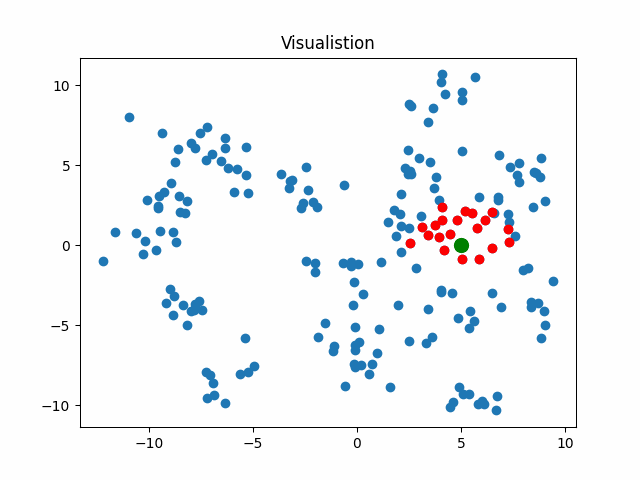

In [26]:
import nearest_neighbors_files.visualisations as visualisations
gif_buf = visualisations.get_circle_gif(
    nn, X,
    pictures_args=dict(
        title="Visualistion"
    )
)
IPImage(data=gif_buf.getvalue())